<a href="https://colab.research.google.com/github/jacksonguedes/PDS/blob/main/PDS_Parte1_Amostras_Recupera%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Teorema de Nyquist



```
# Definição: O Teorema de Nyquist, também conhecido como o Teorema de
Amostragem de Nyquist-Shannon, afirma que um sinal contínuo no tempo pode ser
perfeitamente recuperado a partir de suas amostras se for amostrado a uma taxa
maior do que duas vezes a sua maior frequência (frequência de Nyquist).
```



# Amostrando o Sinal

In [142]:
# Importando as bibliotes

import numpy as np
import matplotlib.pyplot as plt
# Seaborn is only to make the plot more beautiful
import seaborn as sns
sns.set_theme()

In [143]:
# Parâmetros do sinal
f_m = 5  # Frequência máxima do sinal (Hz)
f_s = 20 * f_m  # Frequência de amostragem (Hz), garantindo que f_s > 2f_m, ou seja, frequência de Nyquist (20 vezes a frequência máxima)
t = np.arange(0, 0.2, 1 / 1000)  # Tempo contínuo para o sinal original
n = np.arange(0, 0.2, 1 / f_s)  # Instantes de amostragem (tempo discreto)

In [144]:
# Sinal original (sinal de senóide)
signal = np.sin(2 * np.pi * f_m * t)  # Equação: x(t) = sin(2πf_m * t)

In [145]:
# Amostragem do sinal
sampled_signal = np.sin(2 * np.pi * f_m * n)  # Equação: x[n] = sin(2πf_m * nT_s)

<ipython-input-146-147f4e5447c0>:4: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(n, sampled_signal, 'r', markerfmt='ro', basefmt='r-', label='Amostras', use_line_collection=True)  # Amostras


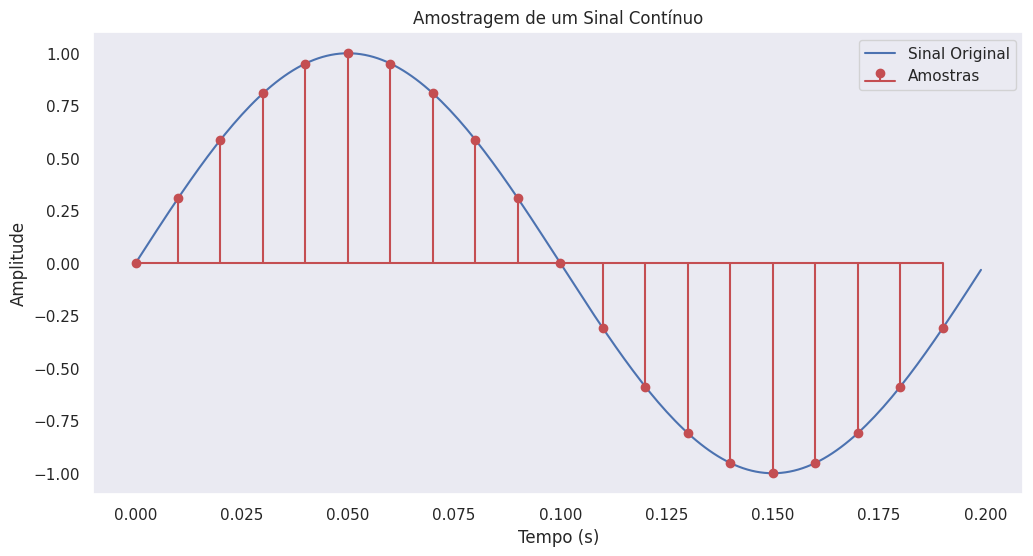

In [146]:
# Plotagem dos sinais
plt.figure(figsize=(12, 6))
plt.plot(t, signal, label='Sinal Original')  # Sinal contínuo original
plt.stem(n, sampled_signal, 'r', markerfmt='ro', basefmt='r-', label='Amostras', use_line_collection=True)  # Amostras
plt.legend()
plt.title('Amostragem de um Sinal Contínuo')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

# Recuperando sinal a partir das amostras

In [147]:
# Função de interpolação de sinc
def sinc_interp(x, s, t):
    T = x[1] - x[0]  # Período de amostragem
    sinc_matrix = np.sinc((t[:, None] - x[None, :]) / T)  # Cria a matriz de sinc
    return np.dot(sinc_matrix, s)  # Realiza a interpolação de sinc

In [148]:
# Recuperação do sinal utilizando Interpolação de Sinc
recovered_signal = sinc_interp(n, sampled_signal, t)

<ipython-input-149-099d1b2fc895>:4: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(n, sampled_signal, 'r', markerfmt='ro', basefmt='r-', label='Amostras', use_line_collection=True)  # Amostras


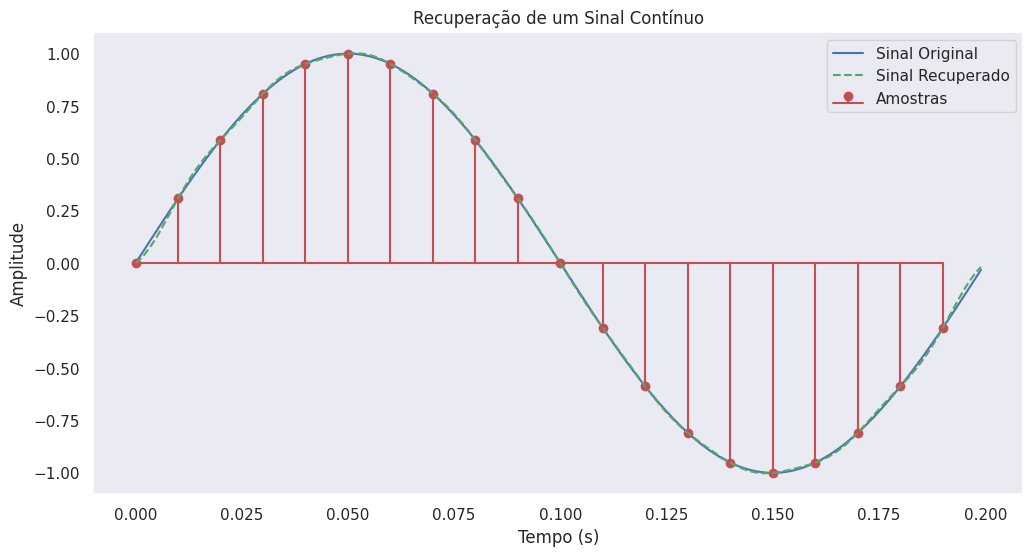

In [149]:
# Plotagem dos sinais
plt.figure(figsize=(12, 6))
plt.plot(t, signal, label='Sinal Original')  # Sinal contínuo original
plt.stem(n, sampled_signal, 'r', markerfmt='ro', basefmt='r-', label='Amostras', use_line_collection=True)  # Amostras
plt.plot(t, recovered_signal, 'g--', label='Sinal Recuperado')  # Sinal recuperado
plt.legend()
plt.title('Recuperação de um Sinal Contínuo')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

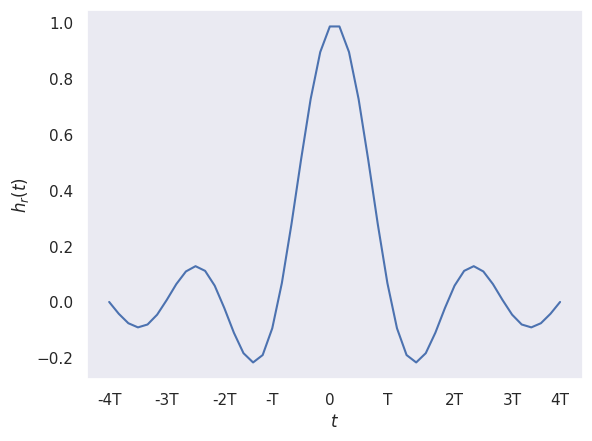

In [150]:
# Código tirado do GitHub do professor Edmar Candeia da UFCG
# Local: https://github.com/ecandeia/PDS/blob/master/Amostragem/Introducao.ipynb

x = np.linspace(-4,4,48)
y = np.sinc(x)
x_label = ['-4T', ' ', ' ', ' ',' ',' ','-3T',' ','',' ',' ',' ','-2T',' ',' ',' ',' ','-T',' ','  ',' ',' ',' ','0',' ', ' ', ' ', ' ',' ','T',' ',' ',' ',' ',' ',' ','2T',' ',' ',' ',' ',' ','3T',' ',' ',' ',' ','4T']
#y = [8, 10, 23, 78, 2]
## FAZER: Modificar para deixar automatico
#for i in range(1,len(y)):
#    x_label[i] = ' '
#    if (np.abs(y[i]) < 1e-2):
#     x_label[i] = 'T'
default_x_ticks = range(len(x_label))
plt.plot(default_x_ticks, y)
plt.xticks(default_x_ticks, x_label)
plt.ylabel('$h_r(t)$')
plt.xlabel('$t$')
plt.grid()
plt.show()

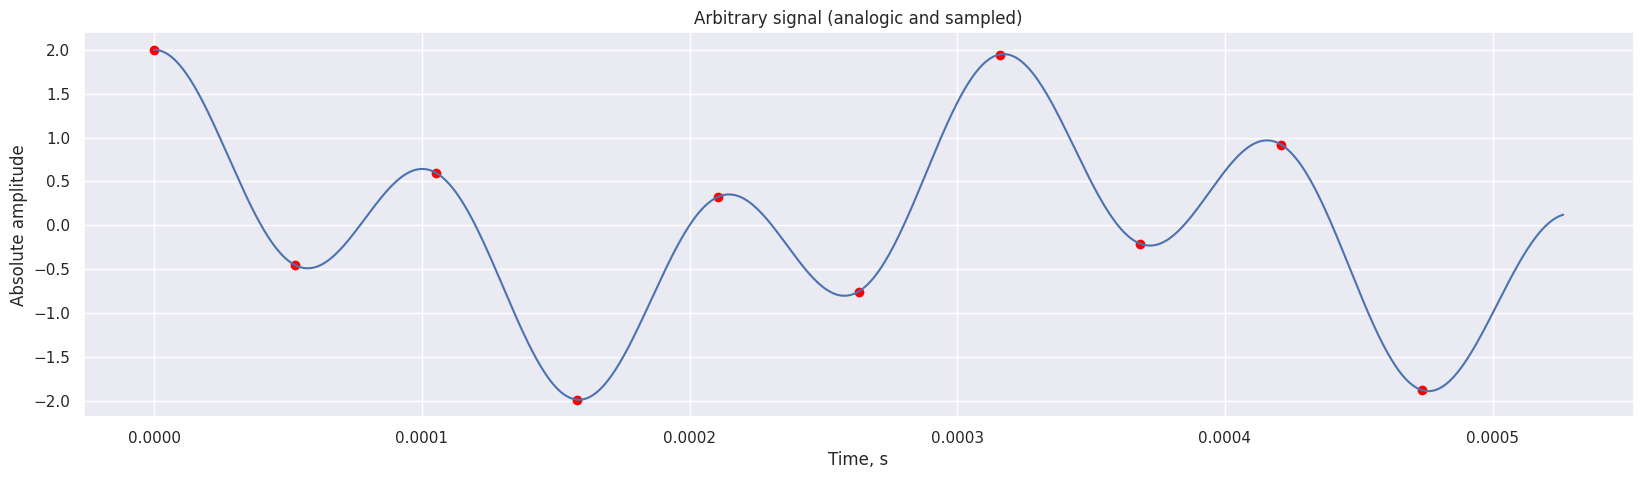

In [151]:
## Demonstra a recuperação pela soma de sincs
## Contribuição de Joao Pedro Melquiades Gomes <joao.melquiades@ee.ufcg.edu.br>
## Outubro de 2022
# Local: https://github.com/ecandeia/PDS/blob/master/Amostragem/Introducao.ipynb

# Parameters
N = 10 # Number of samples
f1 = 3000 #Hz
f2 = 9500 #Hz
fs = 2*max(f1, f2) # Sampling frequency
n = np.arange(N)/fs #Discrete time
ta = np.linspace(0, N/fs, N*100) # Analogic time

fn = np.cos(2*np.pi*f1*n) + np.cos(2*np.pi*f2*n)
ft = np.cos(2*np.pi*f1*ta) + np.cos(2*np.pi*f2*ta)

plt.figure(figsize=(20,5))
plt.scatter(n, fn, color='red')
plt.plot(ta, ft)
plt.title('Arbitrary signal (analogic and sampled)')
plt.xlabel('Time, s')
plt.ylabel('Absolute amplitude')
plt.show()